In [1]:
using Images, FileIO, Plots


(process:36368): GLib-GIO-WARNING **: 13:20:58.904: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:36368): GLib-GIO-WARNING **: 13:20:58.925: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [15]:
function load_image(path)
    img = load(path)
    ny, nx = size(img)
    arr = zeros(ny,nx)
    for i = 1:nx
        for j = 1:ny
            #if img[j,i].g != 0
                arr[j,i] = round(img[j,i].g)
            #end
        end
    end
    return arr
end



load_image (generic function with 1 method)

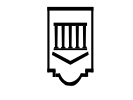

In [23]:
path = "sample2.png"
img = load(path)

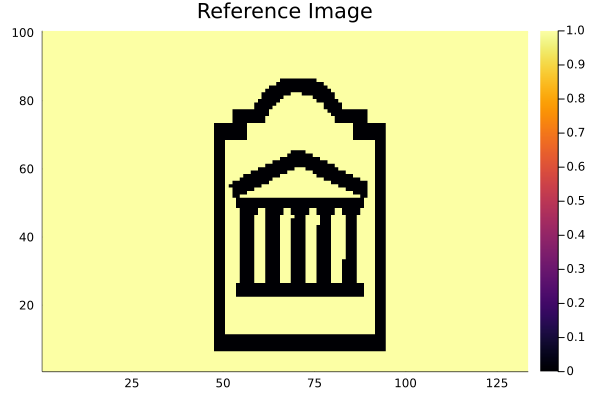

In [24]:

reference = load_image(path)
ny, nx = size(reference)
heatmap(reference, title = "Reference Image")

┌ Info: Saved animation to 
│   fn = C:\Users\evang\Documents\projects\FDTD-geometry\tmp.gif
└ @ Plots C:\Users\evang\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("C:\\Users\\evang\\Documents\\projects\\FDTD-geometry\\tmp.gif")
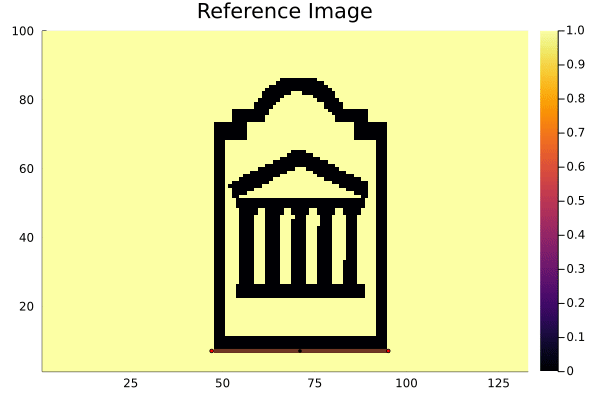

In [25]:
#if the array has zero to the left and one to the right than that coordinate is the left edge
#the reverse is true for the right
left_boundary_coordinates = []
right_boundary_coordinates = []
for iy = 1:ny
    for ix = 1:nx
        current_pixel = reference[iy,ix]
        if ix > 1
            previous_pixel = reference[iy,ix-1]
                if current_pixel == 1 && previous_pixel == 0
                    #println("left edge at (",ix, ",", iy, ")")
                    push!(left_boundary_coordinates,[ix,iy])
                end
        end
        if ix < nx
            next_pixel = reference[iy,ix+1]
            if current_pixel == 1 && next_pixel == 0
                    #println("right edge at (",ix, ",", iy, ")")
                    push!(right_boundary_coordinates,[ix,iy])
            end
        end


    end
end
center_points = zeros(length(left_boundary_coordinates),2)
geometry_length = zeros(length(left_boundary_coordinates))
for i = 1:length(left_boundary_coordinates)
    Lx, y = left_boundary_coordinates[i]
    Rx, _ = right_boundary_coordinates[i]
    center_points[i,:] = [(Rx+Lx)/2, y]
    geometry_length[i] = sqrt((Rx - Lx)^2)
end

f = heatmap(reference, title = "Reference Image")
anim=@animate for  i = 1:size(left_boundary_coordinates)[1]

    f = plot!([left_boundary_coordinates[i][1], right_boundary_coordinates[i][1]],[left_boundary_coordinates[i][2], right_boundary_coordinates[i][2]], 
        legend = false,
        xlims = (1,nx), 
        ylims = (1,ny), 
        lw = 4,
        linealpha = 0.5)

    f = scatter!([center_points[i,1]], [center_points[i,2]], mc = :black, ms = 2)
    f = scatter!([center_points[i,1] - geometry_length[i]/2], [center_points[i,2]], mc = :red, ms = 2)
    f = scatter!([center_points[i,1] + geometry_length[i]/2], [center_points[i,2]], mc = :red, ms = 2)

end
f
gif(anim)

In [26]:
length(center_points)

582